# Проект для «Викишоп» c BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75.

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели.
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Установка-и-импорт-библиотек" data-toc-modified-id="Установка-и-импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Установка и импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Библиотека-NLTK" data-toc-modified-id="Библиотека-NLTK-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Библиотека NLTK</a></span></li><li><span><a href="#Библиотека-spaCy" data-toc-modified-id="Библиотека-spaCy-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Библиотека spaCy</a></span></li><li><span><a href="#Частотный-анализ-текста-и-облако-слов" data-toc-modified-id="Частотный-анализ-текста-и-облако-слов-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Частотный анализ текста и облако слов</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Сравнение-моделей-и-проверка-лучшей-на-тестовой-выборке" data-toc-modified-id="Сравнение-моделей-и-проверка-лучшей-на-тестовой-выборке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сравнение моделей и проверка лучшей на тестовой выборке</a></span></li><li><span><a href="#Toxic-BERT" data-toc-modified-id="Toxic-BERT-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Toxic BERT</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

### Установка и импорт библиотек

In [1]:
!pip install detoxify --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 46.8 MB/s eta 0:00:00


In [2]:
!pip install transformers --q

In [3]:
!pip install wordcloud --q

In [4]:
!pip install pandarallel --q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
tqdm.pandas(desc="progress")

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

import spacy
import en_core_web_sm

from wordcloud import WordCloud

import torch
import transformers

from detoxify import Detoxify

print("Setup Complete")

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Setup Complete


### Загрузка и изучение данных

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
try:
    df = pd.read_csv('/content/drive/MyDrive/python/toxic_comments.csv', index_col=[0])

except:
    df = pd.read_csv('/datasets/toxic_comments.csv', index_col=[0])

In [8]:
RANDOM_STATE = 12345

In [9]:
df.sample(10, random_state = RANDOM_STATE)

,text,toxic
109583,Expert Categorizers \n\nWhy is there no menti...,0
105077,"""\n\n Noise \n\nfart* talk. """,1
82244,"An indefinite block is appropriate, even for a...",0
18740,I don't understand why we have a screenshot of...,0
128310,"Hello! Some of the people, places or things yo...",0
108406,"""::::::::::::::If you read carefully, my comme...",1
25283,"""\nDid you make it at WP:AE? ofShalott """,0
32695,know as much as he thinks.,0
31936,Thank you for your comment and willingness to ...,0
20244,UPDATE 3-12-06\n\nHEY YALL IM GOING TO BE GONE...,0


Потребуется выполнить очистку текстов с помощью регулярных выражений.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


* Отсутствующих значений нет.
* Всего 2 признака: текст комментариев и бинарная метка о токсичности комментария (целевой признак)

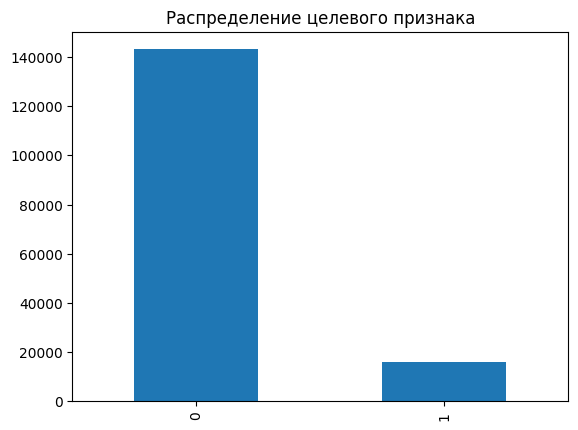

In [11]:
df['toxic'].value_counts().plot(kind='bar')
plt.title('Распределение целевого признака');

Обнаружен дисбаланс классов: токсичных комментариев в 10 раз меньше, чем нетоксичных. При моделировании необходимо будет это учитывать.

In [12]:
df.duplicated().sum()

0

### Подготовка данных

In [13]:
# для более быстрого выполнения проекта выполним работу на выборке из 10000 текстов
df = df.sample(10000, random_state=RANDOM_STATE)

In [14]:
corpus = df['text']

In [15]:
# Функция для очистки текстов
def clear_text(text):
    clean_text = re.sub(r'[^a-zA-z\']', ' ', text.lower())
    clean_text = " ".join(clean_text.split())
    return clean_text

In [16]:
corpus = corpus.apply(lambda x: clear_text(x))

### Библиотека NLTK

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Библиотека spaCy

In [18]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [19]:
def text_preprocessing_3(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

In [20]:
%%time
corpus = corpus.parallel_apply(text_preprocessing_3)

CPU times: user 1.58 s, sys: 224 ms, total: 1.8 s
Wall time: 1min 34s


In [21]:
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

In [22]:
def lemmatize(text):
    doc = nlp(text)
    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [23]:
%%time
corpus = corpus.parallel_apply(lemmatize)

CPU times: user 1.9 s, sys: 192 ms, total: 2.09 s
Wall time: 1min 49s


In [24]:
df['text'] = corpus

In [25]:
df.sample(10,random_state=RANDOM_STATE)

,text,toxic
155081,the way I see it have a plural form title woul...,0
99260,you forget that the work do on the book be sim...,0
5058,if you be look for input from editor with expe...,0
82533,ok what about he abuse the rollback feature be...,0
45332,we be not talk about a whole article be devote...,0
97452,suggest you leave I alone like I request numer...,0
1058,july utc well maybe I be not a real archaeolog...,0
63818,right now the article be violate npov even mor...,0
24317,thank a lot its semi protect now but one thing...,0
92110,I hope admin will respond to the attack in thi...,0


### Частотный анализ текста и облако слов

In [26]:
# функция для формирования списка слов из всех текстов
def get_words(text):
    text_tokens = nltk.tokenize.word_tokenize(text)
    text_tokens = [token.strip() for token in text_tokens if token not in stop_words]
    return text_tokens


In [27]:
# функция построения облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              collocations=False,
                              stopwords=stop_words,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=12345
                         ).generate(" ".join(corpus))
    return wordCloud

In [28]:
# формируем перечни "плохих" и "хороших" слов из токсичных и нетоксичных комментариев
bad_words = get_words(" ".join(df.query('toxic == 1')['text']))
good_words = get_words(" ".join(df.query('toxic == 0')['text']))

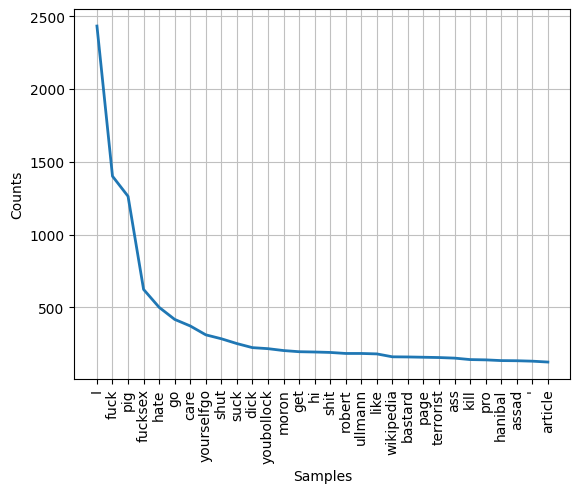

In [29]:
# частотный анализ токсичных текстов
fdist = nltk.probability.FreqDist(bad_words)
fdist.plot(30, cumulative=False);

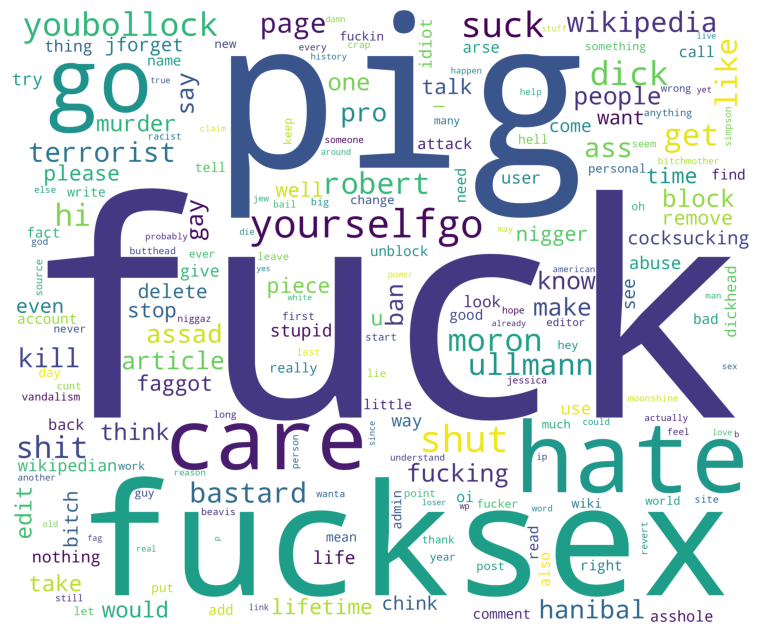

CPU times: user 21.9 s, sys: 2.43 s, total: 24.3 s
Wall time: 24.5 s


In [30]:
# облако слов токсичных текстов
%%time
procWordCloud = get_wordCloud(bad_words)

fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

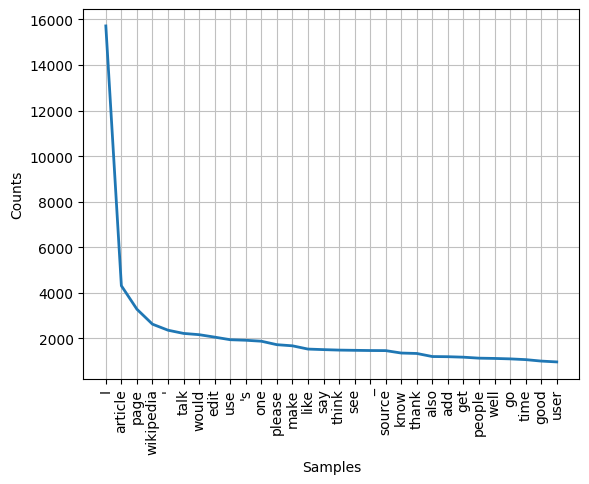

In [31]:
# частотный анализ нетоксичных текстов
fdist = nltk.probability.FreqDist(good_words)
fdist.plot(30, cumulative=False);

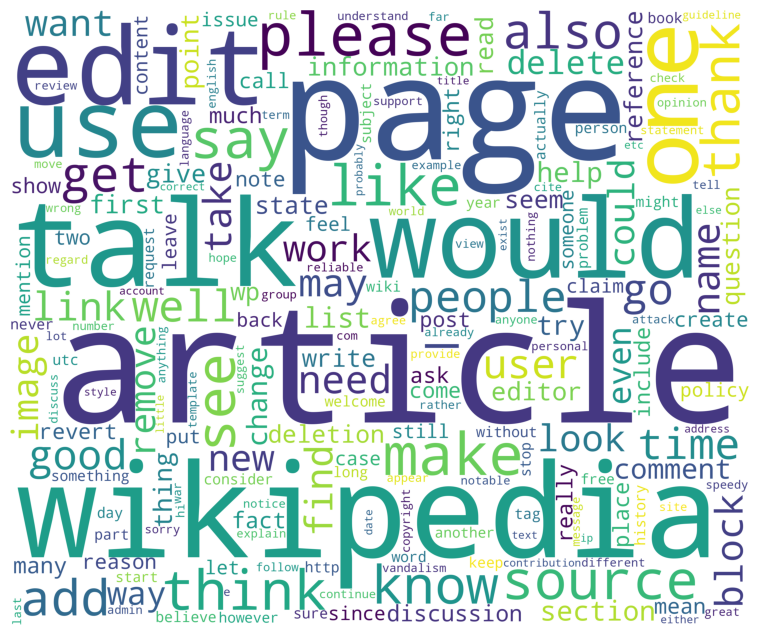

CPU times: user 21.7 s, sys: 2.17 s, total: 23.9 s
Wall time: 25 s


In [32]:
# облако слов нетоксичных текстов
%%time
procWordCloud = get_wordCloud(good_words)

fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()

Облако слов наглядно отображает, какие слова чаще всего используются в токсичных и нетоксичных комментариях. Интересно, что слово википедия одинаково популярно в каждой из категорий.

## Обучение

In [33]:
# формируем выборки

features = df['text']
target = df['toxic']

X_train, X_test, y_train, y_test = train_test_split(features, target,
    test_size=0.25, shuffle=True, random_state=RANDOM_STATE, stratify=target)

### Логистическая регрессия

In [34]:
model_1 = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', solver='liblinear')

In [35]:
%%time
pipeline = Pipeline(steps=[
    ('Tfidf', TfidfVectorizer(stop_words=list(stop_words), ngram_range=(1, 2))),
    ('model',model_1)])

params={'model__C':[.1,1,10,100,1000],
           'model__penalty':['l1','l2']}

grid_model_1 = GridSearchCV(pipeline, cv=4, n_jobs=-1, param_grid=params, scoring='f1')

grid_model_1.fit(X_train, y_train)

CPU times: user 3.77 s, sys: 351 ms, total: 4.12 s
Wall time: 2min 43s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=12345,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10, 100, 1000],
                         'model__penalty': ['l1', 'l2']},
             scoring='f1')

In [36]:
LR_best = grid_model_1.best_estimator_
best_params = pd.DataFrame(grid_model_1.best_params_, index=[0])
LR_f1_best = abs(grid_model_1.best_score_)
best_params['score'] = LR_f1_best

best_params

,model__C,model__penalty,score
0,1000,l1,0.748846


### LGBMClassifier

In [37]:
model_2 = LGBMClassifier(random_state=RANDOM_STATE, class_weight='balanced')

In [38]:
%%time
pipeline = Pipeline(steps=[
                            ('Tfidf', TfidfVectorizer(stop_words=list(stop_words), ngram_range=(1, 2))),
                            ('model', model_2)
                            ])

params = {'model__n_estimators': [50, 100, 150],
          'model__max_depth': [5,10],
          'model__objective' : ['binary'],
          'model__learning_rate': [0.05, 0.1]
          }

grid_model_2 = GridSearchCV(pipeline, cv=4, verbose=0, n_jobs=-1, param_grid=params ,scoring='f1')

grid_model_2.fit(X_train, y_train)

CPU times: user 9.01 s, sys: 245 ms, total: 9.25 s
Wall time: 2min 31s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=12345))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [5, 10],
                         'model__n_estimators': [50, 100, 150],
                         'model__objective': ['binary']},
             scoring='f1')

In [39]:
LGBM_best = grid_model_2.best_estimator_
best_params = pd.DataFrame(grid_model_2.best_params_, index=[0])
LGBM_f1_best = abs(grid_model_2.best_score_)
best_params['score'] = LGBM_f1_best

best_params

,model__learning_rate,model__max_depth,model__n_estimators,model__objective,score
0,0.1,5,50,binary,0.634359


### RandomForestClassifier

In [40]:
model_3 = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')

In [41]:
%%time
pipeline = Pipeline(steps=[
                            ('Tfidf', TfidfVectorizer(stop_words=list(stop_words), ngram_range=(1, 2))),
                            ('model', model_3)
                            ])

params = {'model__n_estimators': [100, 500, 1000],
          'model__max_depth': [5,10]
        }

grid_model_3 = GridSearchCV(pipeline, cv=4, verbose=0, n_jobs=-1, param_grid=params ,scoring='f1')

grid_model_3.fit(X_train, y_train)

CPU times: user 14.3 s, sys: 149 ms, total: 14.5 s
Wall time: 2min 8s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=12345))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10],
                         'model__n_estimators': [100, 500, 1000]},
             scoring='f1')

In [42]:
RFC_best = grid_model_3.best_estimator_
best_params = pd.DataFrame(grid_model_3.best_params_, index=[0])
RFC_f1_best = abs(grid_model_3.best_score_)
best_params['score'] = RFC_f1_best

best_params

,model__max_depth,model__n_estimators,score
0,10,1000,0.466567


### Сравнение моделей и проверка лучшей на тестовой выборке

Для наглядности построим сравнительный график метрики f1 для выбранных моделей.

In [43]:
models = pd.DataFrame({
    'Model': ['LR', 'LGBM', 'RFC'],
    'Score': [LR_f1_best, LGBM_f1_best, RFC_f1_best]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

''

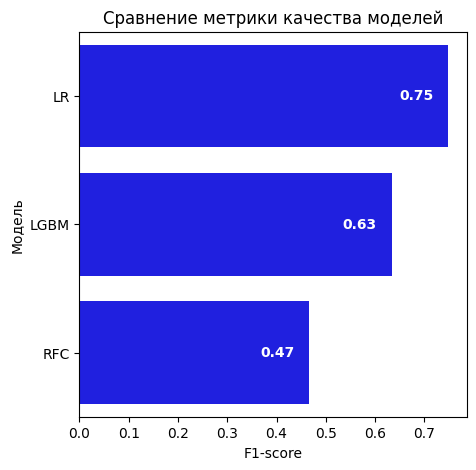

In [44]:
fig, axs = plt.subplots(1,1,figsize=(5,5))
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'b')
values = models.sort_values(by='Score', ascending=False)['Score']
plt.title('Сравнение метрики качества моделей')
plt.xlabel('F1-score')
plt.ylabel('Модель')
for counter, value in enumerate(values):
    axs.text(value - 0.1, counter, round(value,2), color='white', va='center', fontsize=10, fontweight='bold')
;

Лучшей моделью выбрана логистическая регрессия. Теперь оценим метрику на тестовой выборке.

In [45]:
y_pred = LR_best.predict(X_test)
LR_best_f1 = f1_score(y_test, y_pred)
LR_best_f1

0.756

Метрика на тестовой выборке немного лучше.

### Toxic BERT

Для работы с BERT воспользуемся бибилиотекой https://huggingface.co/unitary/toxic-bert .

In [46]:
model_5 = Detoxify('original')

Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt
100%|██████████| 418M/418M [00:02<00:00, 213MB/s]


In [47]:
model_5.predict('example text')

{'toxicity': 0.00064783153,
 'severe_toxicity': 0.000120983976,
 'obscene': 0.00018694345,
 'threat': 0.000116240895,
 'insult': 0.0001811189,
 'identity_attack': 0.00014001886}

In [48]:
%%time
results = []
for sentence in df['text']:
    result = model_5.predict(sentence)
    results.append(result['toxicity'])

CPU times: user 53min 26s, sys: 4.9 s, total: 53min 31s
Wall time: 54min


In [49]:
y_pred = pd.DataFrame(results).round(0)

In [50]:
BERT_f1 = f1_score(df['toxic'], y_pred)
BERT_f1

0.916256157635468

In [51]:
print('Метрика f1 модели Toxic BERT лучше выбранной на', round((BERT_f1 - LR_best_f1)/LR_best_f1*100, 2), '%')

Метрика f1 модели Toxic BERT лучше выбранной на 21.2 %


Таким образом, делаем вывод, что наиболее точное определение токсичности комментариев выполняет модель toxic BERT.

## Выводы

Целью проекта была разработка модели, которая бы определяла токсичность комментариев и отправляла их на модерацию.
Условием задачи было значение метрики F1 на тестовом наборе не менее 0,75.

Были выполнены следующие шаги:

1. Установка и импорт библиотек.

2. Описательная статистика

Было обнаружено, что классы целевого признака не сбалансированы. В последствие это устраняли с помощью параметров stratify при разбивке на выборки, и в class_weight = 'balanced' в гиперпараметрах моделей.

3. Предварительная обработка данных

Тексты были нормализованы: удалены все цифры, знаки препинания и т. д. и преобразованы в строчные буквы.

4. Токенизация и лемматизация.

С помощью библиотек NLTK и SpaCy из комментариев были удалены стопслова, все слова преведены к леммам.

5. Частотный анализ текстов и облако слов.

Для наглядности были построены графики частоты использования слов и облако слов отдельно для каждой группы: токсичных и нетоксичных комментариев.

6. Обучение

Данные были разделены на обучающие и тестовые наборы.

Были использованы три модели: LogisticRegression, LightGBMClassifier и RandomForestClassifier. Для подбора гиперпараметров были использованы в паре pipeline и gridsearch.

Лучший показатель метрики f1 на обучающем наборе данных был у логистической регрессии и составлял 0,75.

Из современных способов анализа текста была выбрана модель toxicBERT, метрика которой оказалась равной 0,91, что на 21% выше метрики лучшей модели, полученной по классическим методам анализа текстов.

7. Вывод

Наиболее точное определение токсичности комментариев выполняет модель toxic BERT. Но для данной модели требуются большие вычислительные мощности: требуется выполнять с GPU.